In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [9]:
avg_age = train_data['Age'].mean()
train_data['Age'].replace(np.nan,avg_age,inplace=True)
avg_age = test_data['Age'].mean()
test_data['Age'].replace(np.nan,avg_age,inplace=True)

In [10]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [11]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [13]:
avg_fare = test_data['Fare'].mean()
test_data['Fare'].replace(np.nan,avg_age,inplace=True)

In [14]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

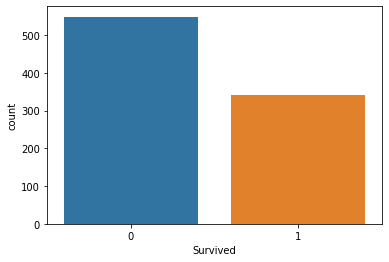

In [15]:
sns.countplot(x='Survived' , data=train_data)  # here 0 is dead , 1 is alive

<AxesSubplot:xlabel='Survived', ylabel='count'>

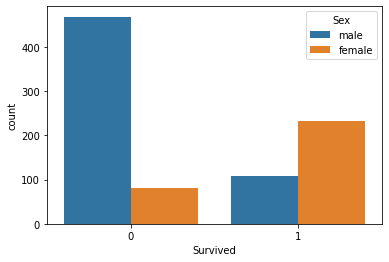

In [16]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

In [17]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women=sum(women)/len(women)*100
print('Percentage of women survivors: ',rate_women)

Percentage of women survivors:  74.20382165605095


In [18]:
men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men=sum(men)/len(men)*100
print('Percentage of women survivors: ',rate_men)

Percentage of women survivors:  18.890814558058924


<AxesSubplot:xlabel='Pclass', ylabel='count'>

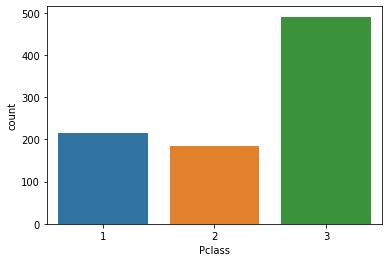

In [19]:
sns.countplot(x='Pclass',data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

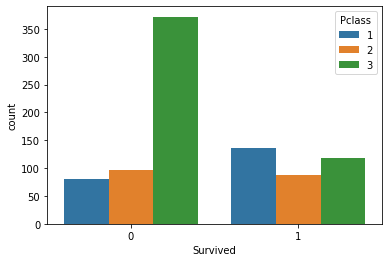

In [20]:
sns.countplot(x='Survived',hue='Pclass' ,data=train_data)

In [21]:
first_class = train_data.loc[train_data.Pclass == 1]['Survived']
rate_fc = sum(first_class)/len(first_class) *100
print('Percentage of first class survivors: ',rate_fc)

Percentage of first class survivors:  62.96296296296296


In [22]:
second_class = train_data.loc[train_data.Pclass == 2]['Survived']
rate_fc = sum(second_class)/len(second_class) *100
print('Percentage of second class survivors: ',rate_fc)

Percentage of second class survivors:  47.28260869565217


In [23]:
third_class = train_data.loc[train_data.Pclass == 3]['Survived']
rate_fc = sum(third_class)/len(third_class) *100
print('Percentage of third class survivors: ',rate_fc)

Percentage of third class survivors:  24.236252545824847


<AxesSubplot:xlabel='Survived', ylabel='count'>

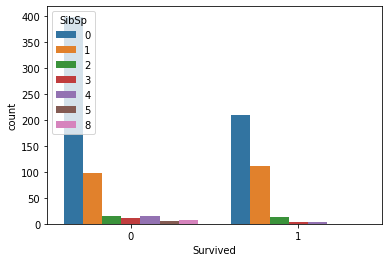

In [24]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

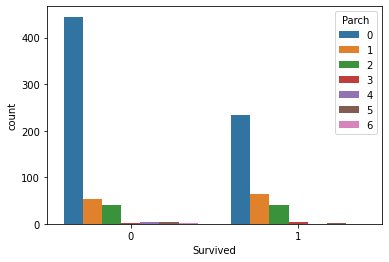

In [25]:
sns.countplot(x = 'Survived', hue = 'Parch', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

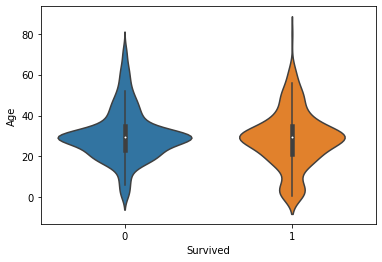

In [26]:
sns.violinplot(x = 'Survived', y = 'Age', data = train_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

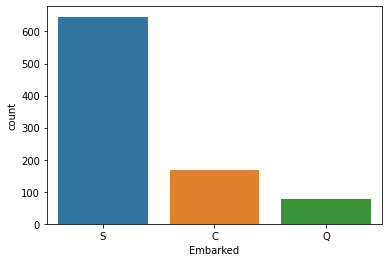

In [27]:
sns.countplot(x = 'Embarked', data= train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

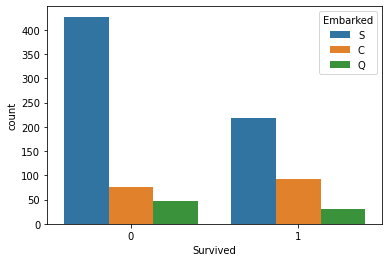

In [28]:
sns.countplot(x = 'Survived', hue = 'Embarked', data= train_data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

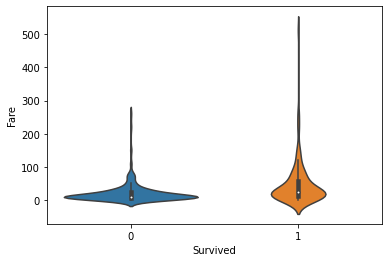

In [29]:
sns.violinplot(x = 'Survived', y = 'Fare', data = train_data)

In [30]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [31]:
test_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.030874,0.003818,0.043080,0.008317
Pclass,-0.026751,1.000000,-0.440782,0.001087,0.018721,-0.576813
Age,-0.030874,-0.440782,1.000000,-0.079535,-0.045073,0.326246
SibSp,0.003818,0.001087,-0.079535,1.000000,0.306895,0.171601
Parch,0.043080,0.018721,-0.045073,0.306895,1.000000,0.230091
Fare,0.008317,-0.576813,0.326246,0.171601,0.230091,1.000000


<AxesSubplot:>

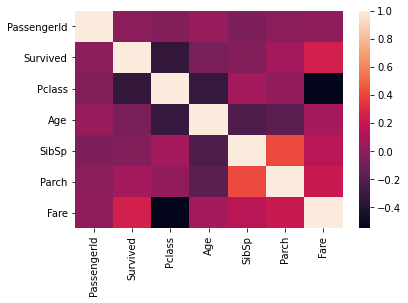

In [32]:
sns.heatmap(train_data.corr())

In [33]:
train_data['Sex'] = train_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)

In [34]:
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [36]:
train_data.drop(['Name','Ticket'],axis=1 , inplace=True)
test_data.drop(['Name','Ticket'],axis=1 , inplace=True)

In [37]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [38]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
dataset = [train_data, test_data]
for data in dataset:
    data.loc[data['Age'] <= 20, 'Age'] = 0
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40),'Age'] = 1
    data.loc[(data['Age'] > 40) & (data['Age'] <= 60),'Age'] = 2
    data.loc[data['Age'] > 60, 'Age'] = 3

In [40]:
for data in dataset:
    data.loc[data['Fare'] <= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15),'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 31),'Fare'] = 2
    data.loc[data['Fare'] > 31, 'Fare'] = 3

In [41]:
for data in dataset:
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0
1,2,1,1,1,1,1,0,3,1
2,3,1,3,1,1,0,0,0,0
3,4,1,1,1,1,1,0,3,0
4,5,0,3,0,1,0,0,1,0


In [43]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,1,0,0,0,2
1,893,3,1,2,1,0,0,0
2,894,2,0,3,0,0,1,2
3,895,3,0,1,0,0,1,0
4,896,3,1,1,1,1,1,0


In [44]:
x_train = train_data.drop(['Survived','PassengerId'],axis=1).values  # except Survived & Passengers all are independent features
y_train = train_data['Survived'].values # only select dependent feature
X_test = test_data.drop('PassengerId',axis=1).values  

In [45]:
print(x_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 7)
(891,)
(418, 7)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.2,random_state=5)

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [48]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train,pred_train)
test_accuracy = accuracy_score(y_test,pred_test)
print("Training Accuracy : ",train_accuracy)
print("Testing Accuracy : ",test_accuracy)

Training Accuracy :  0.7963483146067416
Testing Accuracy :  0.8268156424581006


In [50]:
final_pred = classifier.predict(X_test)

In [51]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = final_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
submission.to_csv('titanic_submission.csv', index = False)